# Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [18]:
df = pd.read_csv("social_ads.csv")

In [19]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [20]:
df.isnull().sum() # check if there are null values

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
df.dtypes # identify the data types

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [22]:
df.duplicated().sum() # dont need to drop these records

33

# Transform Data

In [23]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
df['Age'].max()

60

In [25]:
df['Age'].min()

18

In [26]:
# Create age groups
age_bins = [17, 25, 35, 45, 60]
age_labels = ['18-25', '26-35', '36-45', '46-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [27]:
df['EstimatedSalary'].max()

150000

In [28]:
df['EstimatedSalary'].min()

15000

In [29]:
# Create salary levels
salary_bins = [0, 30000, 60000, 90000, 150000]
salary_labels = ['Low', 'Medium', 'High', 'Very High']
df['SalaryLevel'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=salary_labels)

In [30]:
# Save the cleaned and transformed dataset
df.to_csv("social_ads_transformed.csv", index=False)

# Generate Insights

In [31]:
age_group_purchase = df.groupby('AgeGroup')['Purchased'].mean()

In [32]:
salary_level_purchase = df.groupby('SalaryLevel')['Purchased'].mean()

In [33]:
pivot = df.pivot_table(values='Purchased', index='AgeGroup', columns='SalaryLevel', aggfunc='mean')

# Visualizations

Text(0, 0.5, 'Purchase Rate')

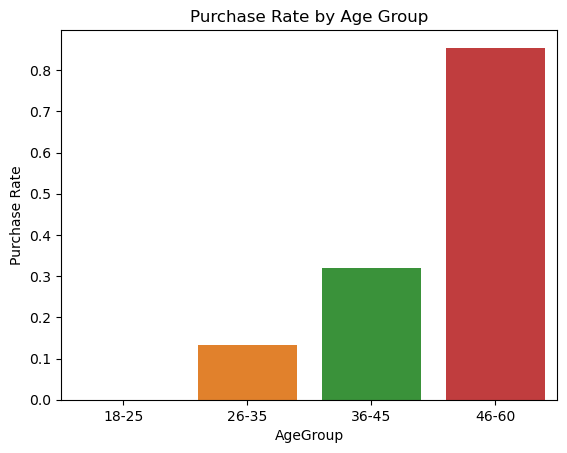

In [34]:
# Bar chart: Age Group
sns.barplot(x=age_group_purchase.index, y=age_group_purchase.values)
plt.title("Purchase Rate by Age Group")
plt.ylabel("Purchase Rate")

### Insights : 
- Individuals aged 36–45 and 46–60 show significantly higher purchase rates.
- Young adults (18–25) purchase much less.

Text(0, 0.5, 'Purchase Rate')

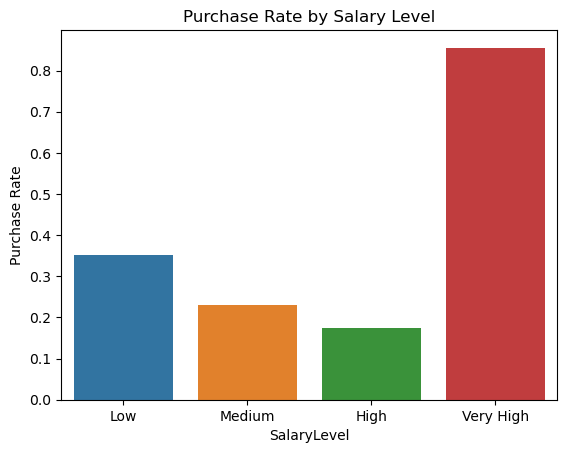

In [47]:
# Bar chart: Salary Level
sns.barplot(x=salary_level_purchase.index, y=salary_level_purchase.values)
plt.title("Purchase Rate by Salary Level")
plt.ylabel("Purchase Rate")

## Insights : 
- Purchase probability increases with salary
- But Low salary people are tends to purches significantly.

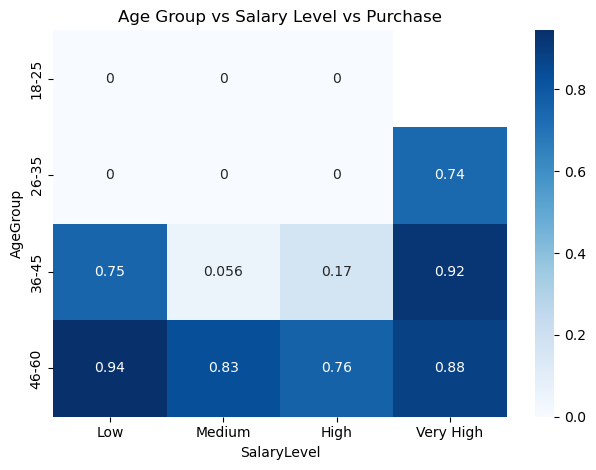

In [48]:
# Heatmap
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Age Group vs Salary Level vs Purchase")

plt.tight_layout()
plt.show()

## Insights : 
- Best performing segment: 36–45 or 46–60 with High or Very High salaries.
- Weakest segment: 18–25

In [53]:
correlation = df['Age'].corr(df['EstimatedSalary'])

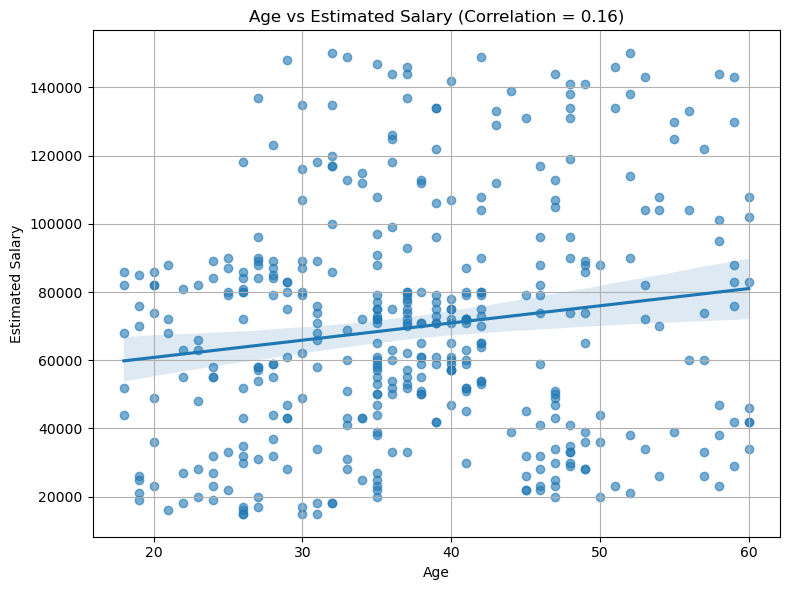

In [54]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='EstimatedSalary', data=df, scatter_kws={'alpha':0.6})
plt.title(f"Age vs Estimated Salary (Correlation = {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

## Insights : 
- As Age increases, Estimated Salary tends to increase slightly
- But the relationship is not strong or highly predictive

In [55]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

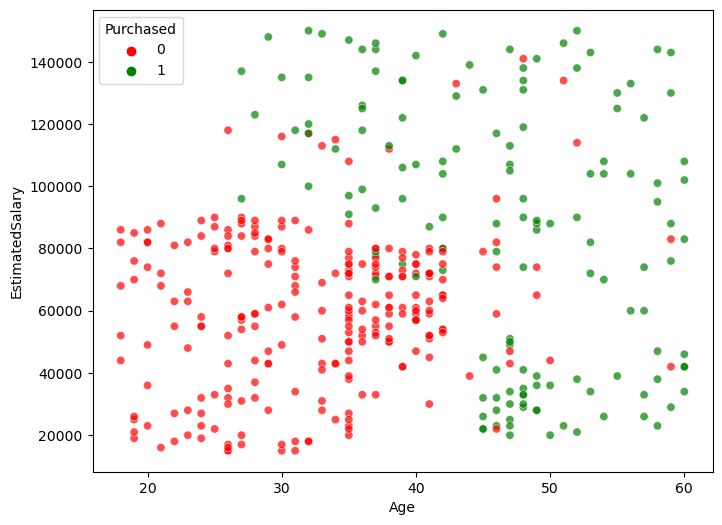

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Purchased',           # Use Purchased as legend (0 or 1)
    palette={0: 'red', 1: 'green'},
    alpha=0.7,
    data=df
)

# Insights : 
- Individuals who purchased the item (green dots) are more concentrated in the older age and higher salary range.